In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [18]:
df = pd.read_csv('C:\\Users\\wajah\\Documents\\Python Projects\\Review Sentiment Analysis\\The Last of Us\\Dataset.csv')
print(df.head())

                                              review  score
0  Maybe the best game I have ever played. It jus...      9
1  Not worth your time or your money. Supposedly ...      0
2  A good shooter-horror adventure with the belov...      8
3  This game has awoken my love for gaming, I wen...     10
4  Very well executed and not too repetitive, unl...      9


In [19]:
print(df.isnull().sum())

review    3
score     0
dtype: int64


In [20]:
df = df.dropna()
print(df.isnull().sum())

review    0
score     0
dtype: int64


In [21]:
import nltk
import re
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

df["review"] = df["review"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wajah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
ratings = df["score"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

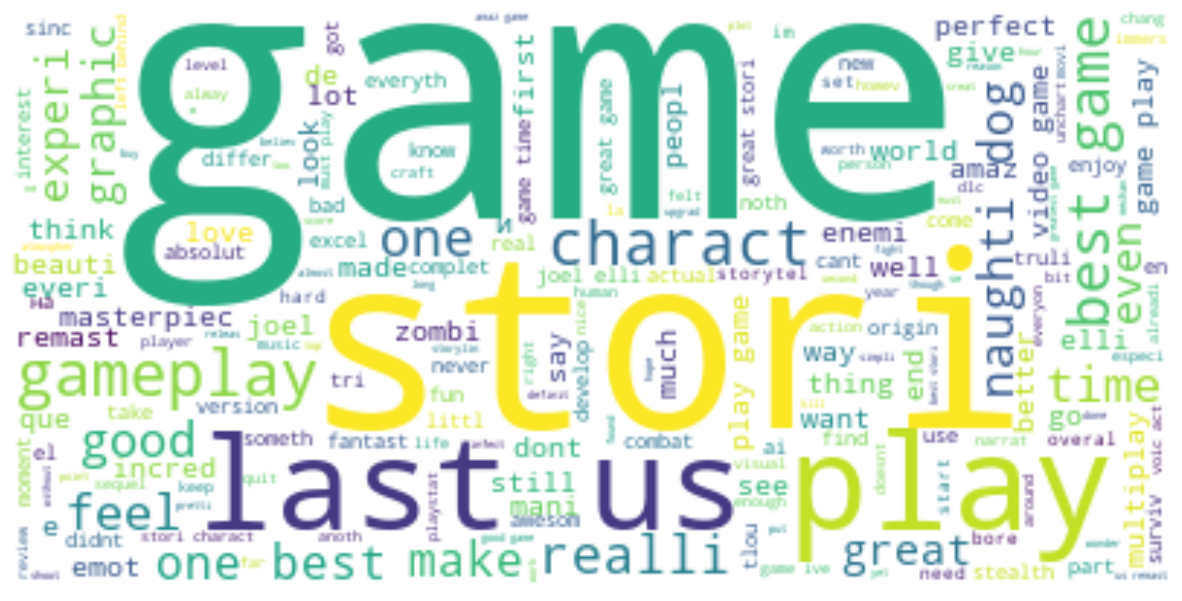

In [24]:
text = " ".join(i for i in df.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["review"]]
df = df[["review", "Positive", "Negative", "Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wajah\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              review  Positive  Negative  \
0  mayb best game ever play damn game good cant d...     0.186     0.189   
1  worth time money suppos one play charact let p...     0.430     0.085   
2  good shooterhorror adventur belov stori father...     0.190     0.132   
3  game awoken love game went know hype regard kn...     0.116     0.000   
4  well execut repetit unlik game genr great stor...     0.279     0.168   

   Neutral  
0    0.626  
1    0.485  
2    0.679  
3    0.884  
4    0.553  


In [34]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [35]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  682.8550000000008
Negative:  150.91299999999995
Neutral:  1879.2569999999973
